# Section 2


# Imports

In [35]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix
import itertools

# Set random seed to ensure reproducible runs
RSEED = 50

# הערות חשובות
<li>הכנתי שני סטים של מידע, אחד עם נתוני ישובים בלבד והשני עם נתוני קלפי
<li>לפעמים הרצתי עם שני סטים שונים והשוויתי בין התוצאות (לדוגמה בסעיף 4)
<li>בסעיף 3 סט המידע שונה כי ניגשתי אליו בצורת שונה וחלקתי את המלפלגות לגושים במקום להתייחס ברמת מפלגות בודדות ואיחודים בין מפלגות
<li>הסימון B בשמות של המשתנים מתייחס לקבצים עם נתוני קלפי, והסימון C מתייחס לקבצים עם נתוני ישוב בלבד. המספרים 21,22,23 מסמלים את מספר מערכת הבחירות 


## Elections 21

In [2]:
df_b_21 = pd.read_csv("datasets/expb_21.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
# print("Train data with localities and polling stations \n")
# print(df_b_21.shape)
# print(df_b_21.head())

X_b_21 = df_b_21.values


df_c_21 = pd.read_csv("datasets/expc_21.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
# print("\n\nTrain data with localities only \n")
# print(df_c_21.shape)
# print(df_c_21.head())

X_c_21 = df_c_21.values

## Elections 22

In [3]:
# index_names={0:"Locality Name", 1:"Locality Code", 2:"Polling Num", 3:"BzB", 4:"Electors", 5:"Disqualified", 6:"Qualified", 
#              7:"..."}

# names_map={'שם ישוב':"Locality Name", 
#            'סמל ישוב':"Locality Code", 
#            'קלפי':"Polling Num", 
#            'בזב':"BzB", 
#            'מצביעים':"Electors", 
#            'פסולים':"Disqualified", 
#            'כשרים':"Qualified",
#           } 

df_b_22 = pd.read_csv("datasets/expb_22.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
# print("Train data with localities and polling stations \n")
# print(df_b_22.shape)
# print(df_b_22.head())

X_b_22 = df_b_22.values


df_c_22 = pd.read_csv("datasets/expc_22.csv", encoding= 'Windows-1255')#.rename(columns=names_map) #.rename(index=index_names)
# print("\n\nTrain data with localities only \n")
# print(df_c_22.shape)
# print(df_c_22.head())

X_c_22 = df_c_22.values



## Load Test Data - Elections 23

In [4]:
df_b_23 = pd.read_csv("datasets/expb_23.csv", encoding= 'Windows-1255') #.drop([''], axis=1)
df_b_23 = df_b_23.iloc[:, :-1] #removing empty column at the end
# print("Test data with localities and polling stations \n")
# print(df_b_23.shape)
# print(df_b_23.head())

X_test_polling = df_b_23.values
# X_test_polling = np.delete(X_test_polling,[2],1) # drop Locality name column
# print(X_test_polling)


# print("\n\nTest data with localities only \n")
df_c_23 = pd.read_csv("datasets/expc_23.csv", encoding= 'Windows-1255')
df_c_23 = df_c_23.iloc[:, :-1] #removing empty column at the end
# print(df_c_23.shape)
# print(df_c_23.head())

# X_test_locality = df_c_23.values
# X_test_locality = np.delete(X_test_locality,[2],1) # drop Locality name column
# print(X_test_locality)

Prepare a dictionary of party:code for all parties in elections round 21

In [5]:
# encoding_df = pd.read_excel("datasets/encoding_columns.xlsx", sheet_name='Sheet2', header=None)

# parties = index_df[0].tolist()
# encoding = index_df[1].tolist()

# # print(parties, encoding)

# parties_dict = dict(zip(parties, encoding))
# print(parties_dict)


parties = df_b_21.columns[7:] # columns names
# print(parties.shape)

columnsSet = set(parties)
print (len(columnsSet))
columnsSet.update(df_b_22.columns[11:])
print (len(columnsSet))
columnsSet.update(df_b_23.columns[11:])
print (len(columnsSet))

code2party = dict()
party2code = dict()

for v, k in enumerate(columnsSet,1):
    if k != '':
        code2party[v]= k
        party2code[k]= v
    
print(code2party)
print("\n",party2code)

43
56
60
{1: 'ינ', 2: 'מחל', 3: 'ר', 4: 'ןך', 5: 'נ', 6: 'ףז', 7: 'ז', 8: 'קץ', 9: 'זנ', 10: 'יץ', 11: 'כי', 12: 'כ', 13: 'ני', 14: 'ףי', 15: 'ום', 16: 'פה', 17: 'ץ', 18: 'זי', 19: 'ץי', 20: 'ףך', 21: 'ץז', 22: 'ק', 23: 'קן', 24: 'זן', 25: 'כף', 26: 'יף', 27: 'יז', 28: 'צ', 29: 'ןנ', 30: 'יר', 31: 'נץ', 32: 'קי', 33: 'קף', 34: 'מרצ', 35: 'קך', 36: 'נק', 37: 'ףנ', 38: 'ין', 39: 'זכ', 40: 'זך', 41: 'יק', 42: 'שס', 43: 'ודעם', 44: 'י', 45: 'נך', 46: 'אמת', 47: 'ג', 48: 'ל', 49: 'נר', 50: 'ףץ', 51: 'זץ', 52: 'נז', 53: 'צק', 54: 'טב', 55: 'רק', 56: 'ן', 57: 'כן', 58: 'דעם', 59: 'צן', 60: 'ךק'}

 {'ינ': 1, 'מחל': 2, 'ר': 3, 'ןך': 4, 'נ': 5, 'ףז': 6, 'ז': 7, 'קץ': 8, 'זנ': 9, 'יץ': 10, 'כי': 11, 'כ': 12, 'ני': 13, 'ףי': 14, 'ום': 15, 'פה': 16, 'ץ': 17, 'זי': 18, 'ץי': 19, 'ףך': 20, 'ץז': 21, 'ק': 22, 'קן': 23, 'זן': 24, 'כף': 25, 'יף': 26, 'יז': 27, 'צ': 28, 'ןנ': 29, 'יר': 30, 'נץ': 31, 'קי': 32, 'קף': 33, 'מרצ': 34, 'קך': 35, 'נק': 36, 'ףנ': 37, 'ין': 38, 'זכ': 39, 'זך': 40, 'יק': 41, 'שס':

In [52]:

names_map={'שם ישוב':"Locality Name", 
           'סמל ישוב':"Locality Code", 
           'מספר קלפי':"Polling Num", 
           'קלפי':"Polling Num",
           'בזב':"BzB", 
           'סמל ועדה':"committee code",
           'ברזל':"Barzel",
           'ריכוז':"Rikuz",
           'שופט':"Judge", 
           'מצביעים':"Voters",
           'פסולים':"Disqualified", 
           'כשרים':"Qualified",
          } 

df_b_21_translated = df_b_21.rename(columns=names_map)
df_b_22_translated = df_b_22.rename(columns=names_map)
df_b_23_translated = df_b_23.rename(columns=names_map)

df_b_21_encoded = df_b_21_translated.rename(columns=party2code)
df_b_22_encoded = df_b_22_translated.rename(columns=party2code)
df_b_23_encoded = df_b_23_translated.rename(columns=party2code)


df_c_21_translated = df_c_21.rename(columns=names_map)
df_c_22_translated = df_c_22.rename(columns=names_map)
df_c_23_translated = df_c_23.rename(columns=names_map)

df_c_21_encoded = df_c_21_translated.rename(columns=party2code)
df_c_22_encoded = df_c_22_translated.rename(columns=party2code)
df_c_23_encoded = df_c_23_translated.rename(columns=party2code)


In [7]:
df_b_21_encoded.head()

,Locality Name,Locality Code,Polling Num,BzB,Voters,Disqualified,Qualified,46,47,58,...,53,17,21,19,22,32,23,33,3,42
0,אבו ג'ווייעד (שבט),967,1.0,546,64,2,62,2,0,31,...,0,0,0,0,0,0,1,0,0,0
1,אבו ג'ווייעד (שבט),967,2.0,739,113,2,111,2,0,69,...,0,0,0,0,0,2,0,0,0,0
2,אבו ג'ווייעד (שבט),967,3.0,630,98,1,97,1,0,75,...,0,0,0,0,0,0,0,0,0,0
3,אבו גוש,472,1.0,518,197,6,191,4,0,36,...,0,1,0,0,1,0,0,0,0,1
4,אבו גוש,472,2.0,679,290,3,287,7,0,69,...,0,0,0,0,0,0,0,1,0,2


In [8]:
df_c_21_encoded.head()

,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,46,47,58,15,...,53,17,21,19,22,32,23,33,3,42
0,שחר,7,516,371,0,371,17,2,0,0,...,0,0,0,0,0,0,0,0,0,33
1,תירוש,10,333,237,2,235,4,3,0,0,...,0,0,0,0,0,0,0,0,0,73
2,"ניר ח""ן",11,403,289,1,288,21,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,חצבה,13,502,403,0,403,44,2,0,0,...,0,0,0,0,3,0,0,0,0,2
4,נועם,15,302,217,2,215,1,4,0,0,...,0,0,0,0,0,0,0,0,0,25


In [9]:
df_b_22_encoded.head()

,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,16,6,28,59,17,22,35,8,55,42
0,18,9797,אבו ג'ווייעד (שבט),967,1.0,1,0,559,113,2,...,9,0,0,0,0,1,0,0,0,0
1,18,9798,אבו ג'ווייעד (שבט),967,2.0,1,0,751,224,1,...,12,0,0,0,0,1,1,0,0,0
2,18,9799,אבו ג'ווייעד (שבט),967,3.0,1,0,651,205,6,...,1,0,0,0,0,1,0,0,0,0
3,2,733,אבו גוש,472,1.0,1,0,525,268,3,...,25,0,1,0,0,0,0,0,0,5
4,2,734,אבו גוש,472,2.0,1,0,686,363,6,...,33,0,0,0,0,2,1,0,0,6


In [10]:
df_c_22_encoded.head()

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,46,47,43,...,16,6,28,59,17,22,35,8,55,42
0,17,שחר,7,517,377,0,377,31,8,0,...,98,0,0,0,0,0,0,0,0,39
1,2,תירוש,10,332,245,0,245,1,4,0,...,6,0,0,0,0,0,0,0,0,104
2,17,"ניר ח""ן",11,406,287,0,287,32,1,1,...,94,0,0,0,0,0,0,0,0,4
3,18,חצבה,13,502,373,0,373,24,2,0,...,216,0,0,0,0,2,0,0,0,1
4,17,נועם,15,308,228,1,227,1,4,0,...,13,0,0,0,0,0,0,0,0,36


In [11]:
df_b_23_encoded.head()

,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,31,36,16,6,17,22,32,35,8,42
0,18,9870,אבו גווייעד שבט,967,1.0,1,0,585,126,2,...,0,0,6,1,0,0,0,0,0,2
1,18,9871,אבו גווייעד שבט,967,2.0,1,0,764,249,2,...,0,0,0,0,0,0,0,0,2,0
2,18,9872,אבו גווייעד שבט,967,3.0,1,0,669,220,2,...,0,0,2,1,0,0,0,0,0,0
3,2,736,אבו גוש,472,1.0,1,0,530,299,7,...,0,0,11,0,0,0,0,0,0,2
4,2,737,אבו גוש,472,2.0,1,0,693,388,6,...,0,0,18,0,0,0,0,0,1,0


In [12]:
df_c_23_encoded.head()

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,46,47,43,...,31,36,16,6,17,22,32,35,8,42
0,18,אבו גווייעד שבט,967,2018,595,6,589,13,0,554,...,0,0,8,2,0,0,0,0,2,2
1,2,אבו גוש,472,4821,2718,36,2682,75,4,2157,...,3,2,123,0,2,0,0,1,4,14
2,6,אבו סנאן,473,9422,6090,53,6037,92,6,4458,...,3,3,752,0,2,2,1,2,4,247
3,18,אבו עבדון שבט,958,142,41,1,40,0,0,40,...,0,0,0,0,0,0,0,0,0,0
4,18,אבו קורינאת שבט,968,3037,1336,8,1328,9,0,1263,...,1,0,33,0,2,1,0,2,1,0


Deal with unions and different parties letters

In [13]:
mapper = dict()
mapper[party2code["ןך"]] = [party2code["יף"]]
mapper[party2code["יז"]] = [party2code["יק"]]
mapper[party2code["ןנ"]] = [party2code["יר"]]
mapper[party2code["ז"]] = [party2code["זן"]]
mapper[party2code["אמת"]] = [party2code["אמת"], party2code["מרצ"], party2code["נר"]]
mapper[party2code["ודעם"]] = [party2code["דעם"], party2code["ום"]]
mapper

{4: [26], 27: [41], 29: [30], 7: [24], 46: [46, 34, 49], 43: [58, 15]}

In [14]:
mapper2 = dict()
mapper2[party2code["קץ"]] = [party2code["ני"]]
mapper2[party2code["י"]] = [party2code["יר"]]
mapper2[party2code["ץ"]] = [party2code["כן"]]
mapper2[party2code["נ"]] = [party2code["נק"]]
mapper2[party2code["אמת"]] = [party2code["אמת"], party2code["מרצ"]]
mapper2

{8: [13], 44: [30], 17: [57], 5: [36], 46: [46, 34]}

In [15]:
mapper3 = dict()
mapper3[party2code["ינ"]] = [party2code["ין"]]
mapper3[party2code["נץ"]] = [party2code["כף"]]
mapper3

{1: [38], 31: [25]}

In [16]:
def handle_unions(mapper, table):
    for k,v in mapper.items():
        if(len(v) > 1):
            col = table[v[0]]
            for i in range(1,len(v)):
                col += table[v[i]]
            for item in v:
                table = table.drop(item,axis=1)
            
            table[k] = col
        else:
            table.rename(columns={k:v[0]}, inplace=True)
    return table

In [17]:
df_b_21_unioned = handle_unions(mapper, df_b_21_encoded)
print(df_b_21_unioned.columns.shape)
# df_b_21_unioned.columns

(47,)


In [18]:
df_c_21_unioned = handle_unions(mapper, df_c_21_encoded)
print(df_c_21_unioned.columns.shape)
# df_c_21_unioned.columns

(46,)


In [19]:
df_b_22_unioned = handle_unions(mapper2, df_b_22_encoded)
print(df_b_22_unioned.columns.shape)
# df_b_22_unioned.columns

(42,)


In [20]:
df_c_22_unioned = handle_unions(mapper2, df_c_22_encoded)
print(df_c_22_unioned.columns.shape)
# df_c_22_unioned.to_csv("test22.csv")

(38,)


In [21]:
df_b_23_unioned = handle_unions(mapper3, df_b_23_encoded)
print(df_b_23_unioned.columns.shape)
# df_b_23_unioned.columns

(41,)


In [22]:
df_c_23_unioned = handle_unions(mapper3, df_c_23_encoded)
print(df_c_23_unioned.columns.shape)
# df_c_23_unioned.columns

(37,)


In [23]:
def handle_empty_columns(size, value):
    if value is not None:
        return value
    else:
        return [0]*size

## 1) Data with locality and polling numbers

table1 = dict()
table2 = dict()
table3 = dict()

# print(df_b_23_unioned.columns[:11])
for x in df_b_23_unioned.columns[:11]: # non-parties columns 
    table1[x] = handle_empty_columns(df_b_21_unioned.shape[0], df_b_21_unioned.get(x))
    table2[x] = handle_empty_columns(df_b_22_unioned.shape[0], df_b_22_unioned.get(x))
    table3[x] = handle_empty_columns(df_b_23_unioned.shape[0], df_b_23_unioned.get(x))

for x in code2party.keys(): # parties columns
    table1[x] = handle_empty_columns(df_b_21_unioned.shape[0], df_b_21_unioned.get(x))
    table2[x] = handle_empty_columns(df_b_22_unioned.shape[0], df_b_22_unioned.get(x))
    table3[x] = handle_empty_columns(df_b_23_unioned.shape[0], df_b_23_unioned.get(x))
    
# print(table1)
# print(table2)
# print(table3)


## 2) Data with localities only

table1_c = dict()
table2_c = dict()
table3_c = dict()

# print(df_c_22_unioned.columns[:7])
for x in df_c_23_unioned.columns[:7]: # non-parties columns 
    table1_c[x] = handle_empty_columns(df_c_21_unioned.shape[0], df_c_21_unioned.get(x))
    table2_c[x] = handle_empty_columns(df_c_22_unioned.shape[0], df_c_22_unioned.get(x))
    table3_c[x] = handle_empty_columns(df_c_23_unioned.shape[0], df_c_23_unioned.get(x))

for x in code2party.keys(): # parties columns
    table1_c[x] = handle_empty_columns(df_c_21_unioned.shape[0], df_c_21_unioned.get(x))
    table2_c[x] = handle_empty_columns(df_c_22_unioned.shape[0], df_c_22_unioned.get(x))
    table3_c[x] = handle_empty_columns(df_c_23_unioned.shape[0], df_c_23_unioned.get(x))

In [24]:
df_b_21_final = pd.DataFrame(table1)
print("אמת", df_b_21_final[party2code["אמת"]].head(1)) # check point for data
df_b_21_final.head(2)

אמת 0    6
Name: 46, dtype: int64


,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,51,52,53,54,55,56,57,58,59,60
0,0,0,אבו ג'ווייעד (שבט),967,1.0,0,0,546,64,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,אבו ג'ווייעד (שבט),967,2.0,0,0,739,113,2,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_c_21_final = pd.DataFrame(table1_c)
print("אמת", df_c_21_final[party2code["אמת"]].head(1)) # check point for data
df_c_21_final.head(2)

אמת 0    35
Name: 46, dtype: int64


,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
0,0,שחר,7,516,371,0,371,0,141,0,...,1,0,0,3,0,0,0,0,0,0
1,0,תירוש,10,333,237,2,235,0,124,0,...,0,0,0,10,0,0,0,0,0,0


In [26]:
df_b_22_final = pd.DataFrame(table2)
print("אמת", df_b_22_final[party2code["אמת"]].head(1)) # check point for data
df_b_22_final.head(2)

אמת 0    0
Name: 46, dtype: int64


,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,51,52,53,54,55,56,57,58,59,60
0,18,9797,אבו ג'ווייעד (שבט),967,1.0,1,0,559,113,2,...,0,0,0,0,0,0,0,0,0,0
1,18,9798,אבו ג'ווייעד (שבט),967,2.0,1,0,751,224,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_c_22_final = pd.DataFrame(table2_c)
print("אמת", df_c_22_final[party2code["אמת"]].head(1)) # check point for data
df_c_22_final.head(2)

אמת 0    44
Name: 46, dtype: int64


,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
0,17,שחר,7,517,377,0,377,0,128,0,...,18,0,0,28,0,0,0,0,0,0
1,2,תירוש,10,332,245,0,245,0,93,0,...,20,0,0,11,0,0,0,0,0,0


In [28]:
df_b_23_final = pd.DataFrame(table3)
print("", df_b_22_final[party2code["אמת"]].head(1)) # check point for data
df_b_23_final.head(2)

 0    0
Name: 46, dtype: int64


,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,51,52,53,54,55,56,57,58,59,60
0,18,9870,אבו גווייעד שבט,967,1.0,1,0,585,126,2,...,0,0,0,0,0,0,0,0,0,0
1,18,9871,אבו גווייעד שבט,967,2.0,1,0,764,249,2,...,0,1,0,0,0,0,1,0,0,0


In [29]:
df_c_23_final = pd.DataFrame(table3_c)
print("", df_c_23_final[party2code["אמת"]].head(1)) # check point for data
df_c_23_final.head(2)

 0    13
Name: 46, dtype: int64


,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
0,18,אבו גווייעד שבט,967,2018,595,6,589,0,4,0,...,0,1,0,0,0,0,1,0,0,0
1,2,אבו גוש,472,4821,2718,36,2682,0,280,0,...,0,0,0,5,0,0,0,0,0,0


## בין מפלגות Correlation

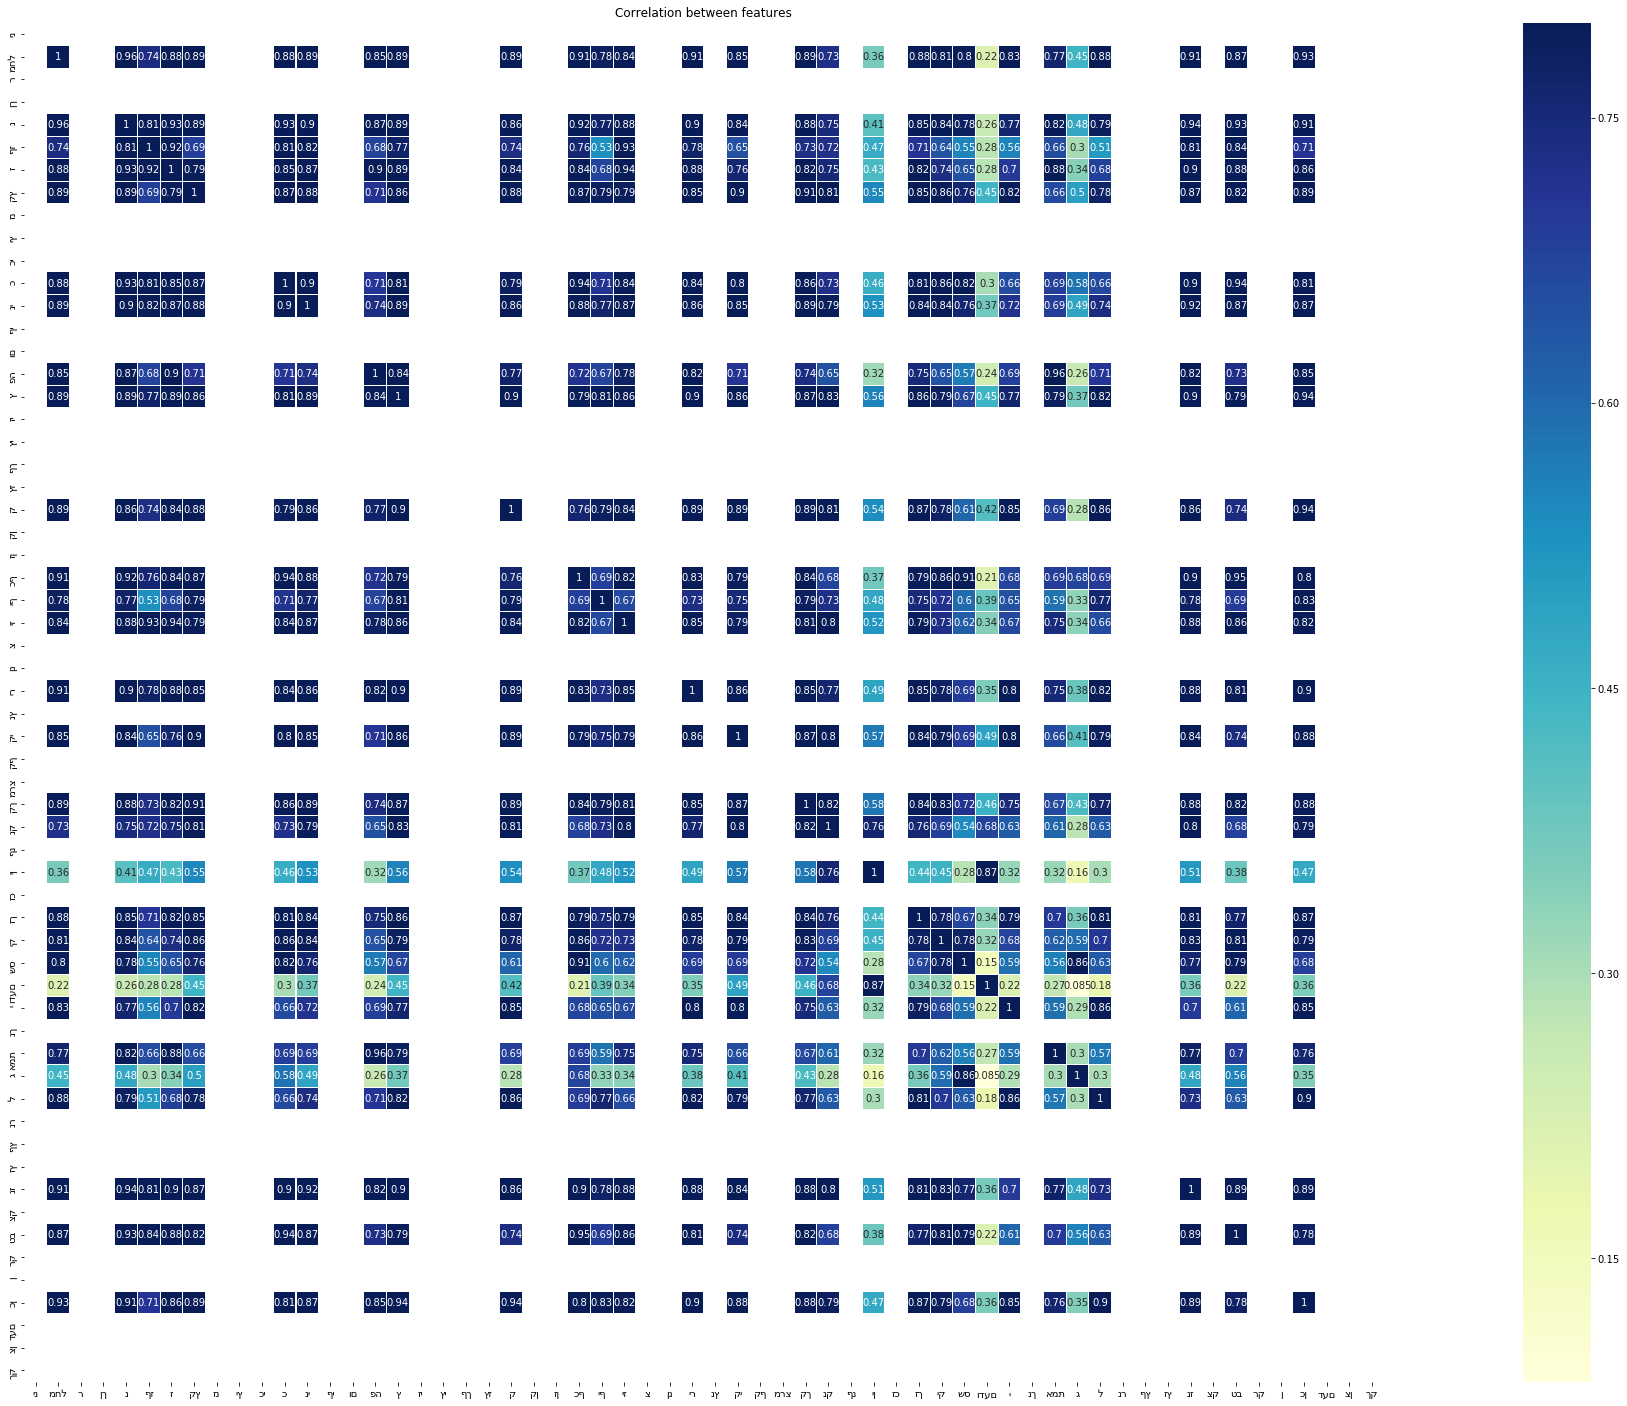

In [30]:
filteredDF = df_c_23_final.iloc[:,7:df_c_23_final.columns.size].rename(columns=code2party)
corrMatrix = filteredDF.corr()
# plt.figure(figsize=(19, 10))
plt.rcParams["figure.figsize"] = [50,25]
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

## הערות
תציגי שמות במקום מספרים
תנתחי איפה את רואה קורלציה יותר טובה/גבוהה. מפלגות ימין-ימין, מפלגות ימין-מרכז או שמאל-מרכז למשל

In [60]:
def plt_parties_votes(dat, start_indx):
    TotalEligableVotes = dat["BzB"].sum() # בזב - בעלי זכות בחירה
    TotalVotes = dat["Voters"].sum()
    
    Percentage = round(TotalVotes/TotalEligableVotes , 2)
    QualifiedVotes = dat["Qualified"].sum()
    DisqualifiedVotes = dat["Disqualified"].sum()
   
    X = dat.columns[start_indx:].tolist()
    Y = dat.iloc[:,start_indx:].values.sum(axis=0).tolist()

    n = dat.columns[11:].unique().__len__()+1
    all_colors = list(plt.cm.colors.cnames.keys())
    random.seed(100)
    c = random.choices(all_colors, k=n)

    plt.figure(figsize=(16,10), dpi= 80)
    plt.bar(X, Y, color=c, width=.5)

    for i, val in enumerate(dat.iloc[:,start_indx:].values.sum(axis=0)):
        plt.text(i, val, f" {int(val)} ({round(val/TotalVotes*100,2)}%)", horizontalalignment='center',rotation=85, verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

    plt.gca().set_xticklabels(X, rotation=90, horizontalalignment= 'center')
    plt.title("Votes by party graph")
    plt.xlabel('Party Name')
    plt.ylabel('Number Of Votes')
    plt.ylim(0, 2000000)

## Votes by party - election 21

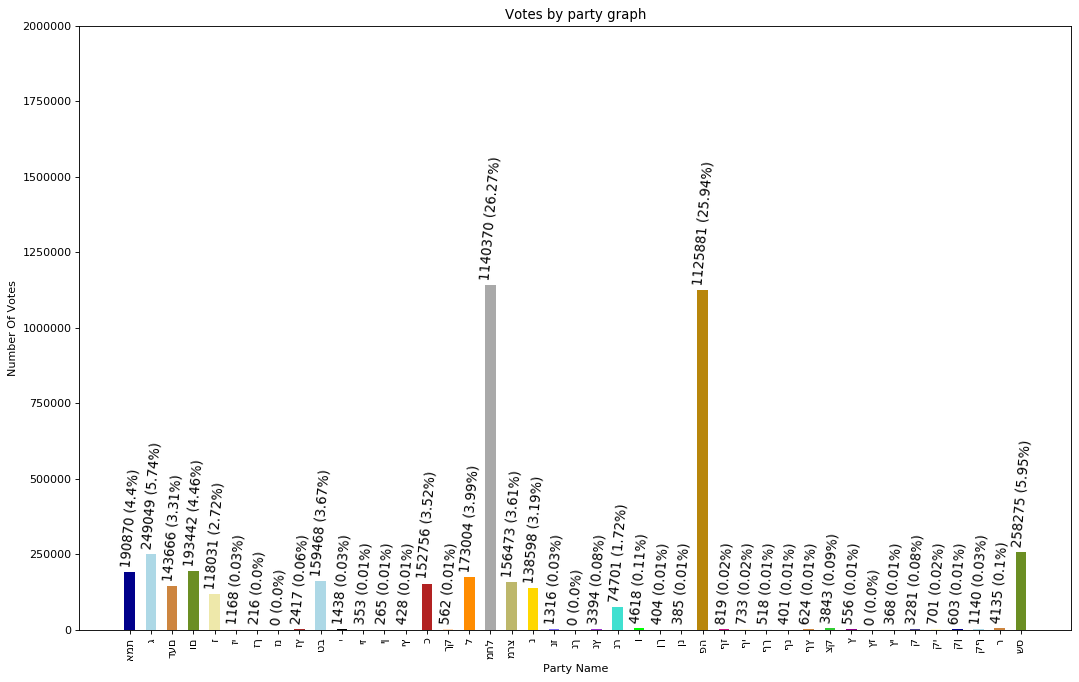

In [61]:
plt_parties_votes(df_c_21_translated, 6)

## Votes by party - election 22

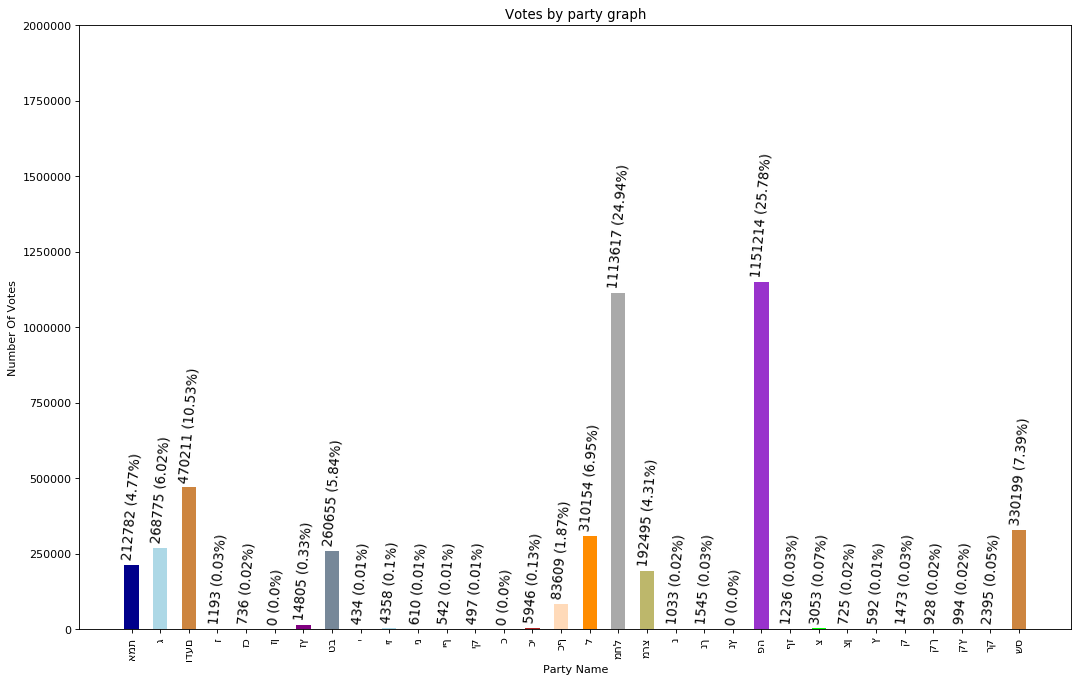

In [62]:
plt_parties_votes(df_c_22_translated, 7)

## Votes by party - election 23

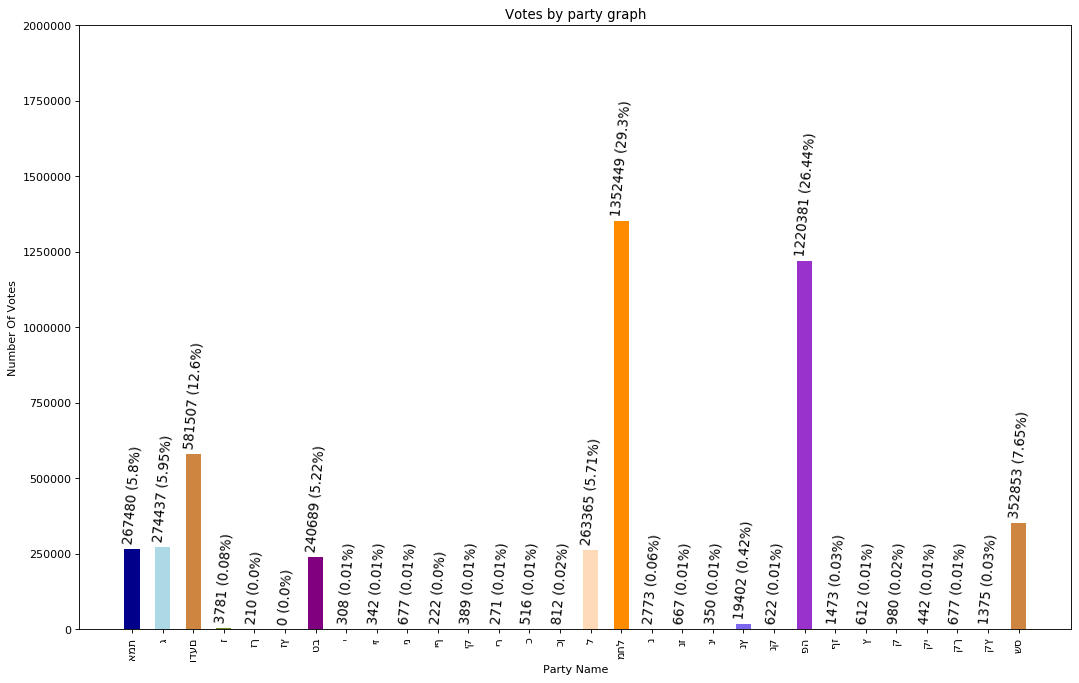

In [63]:
plt_parties_votes(df_c_23_translated, 7)

In [118]:
def plot_votes_by_locality(dat, party_col, election_num):
    
    localities_names_col = 0 if election_num == 21 else 1 
    labels = dat.iloc[0:10, localities_names_col].values # top 10 localities
    labels = np.append(labels,str("Other localities"))
    sizes = dat.iloc[0:10, party_col].values # pick top 10 from sorted data frame
    sizes = np.append(sizes,dat.iloc[11:, party_col].values.sum(axis=0))
    explode = (0.1, 0, 0,0,0,0,0,0,0,0,0)  

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:1.1f}% ({:d} )".format(pct, absolute)

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"), dpi= 80)
    ax.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes),
            shadow=True, startangle=90)

    ax.axis('equal') 
    ax.set_title(f"Votes Distribution of \" {dat.columns[party_col]} \" by locality in elections {election_num}",fontweight=550,fontsize=20,color = 'blue')

    return fig
#     plt.show()

## Likud votes by localties

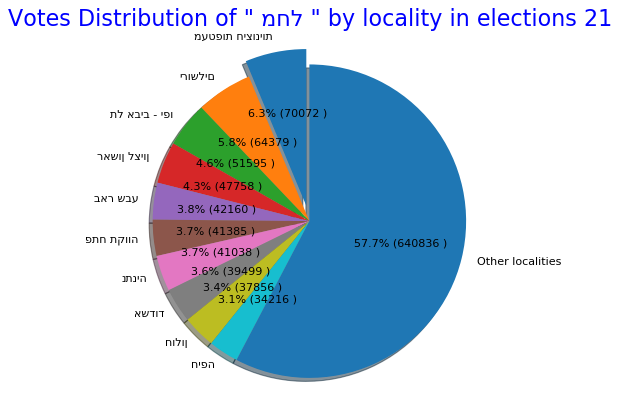

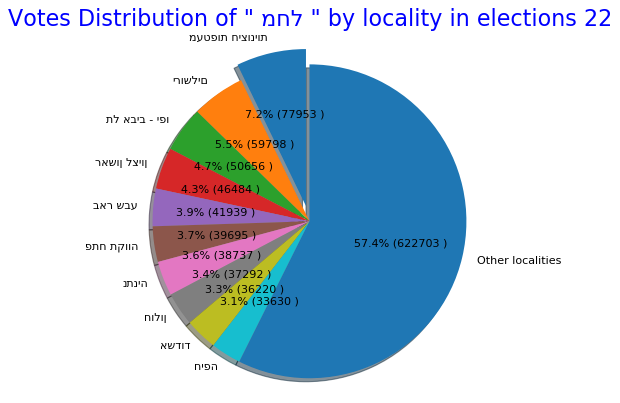

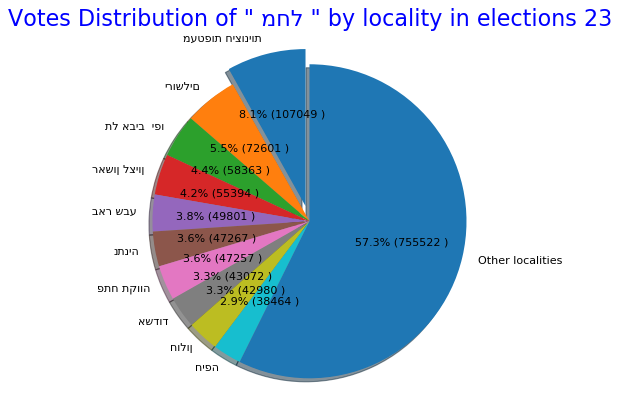

In [124]:
figure1 = plot_votes_by_locality(df_c_21.sort_values(by = df_c_21.columns[23],ascending=False, axis=0), 23, 21)
figure2 = plot_votes_by_locality(df_c_22.sort_values(by = df_c_22.columns[24],ascending=False, axis=0), 24, 22)
figure3 = plot_votes_by_locality(df_c_23.sort_values(by = df_c_23.columns[23],ascending=False, axis=0), 23, 23)

plt.show()

## Blue & White votes by localties in elections 23

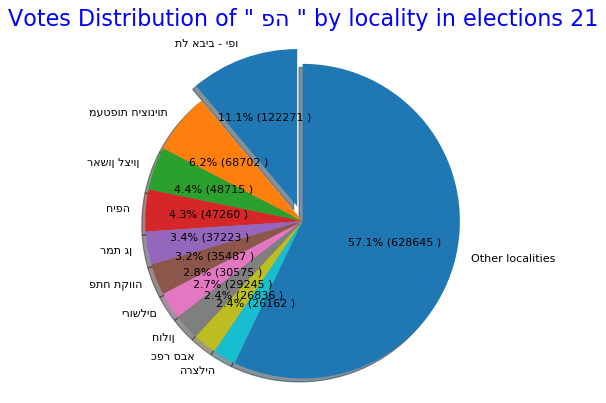

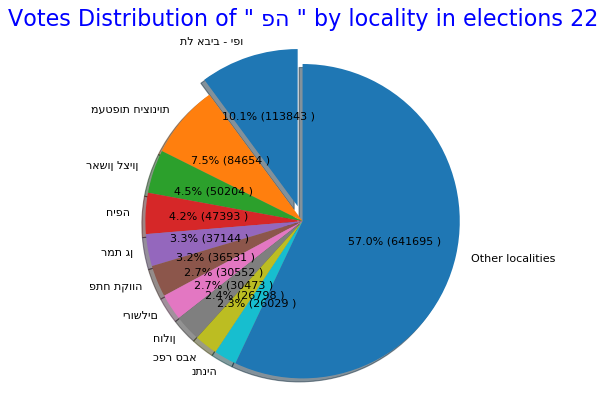

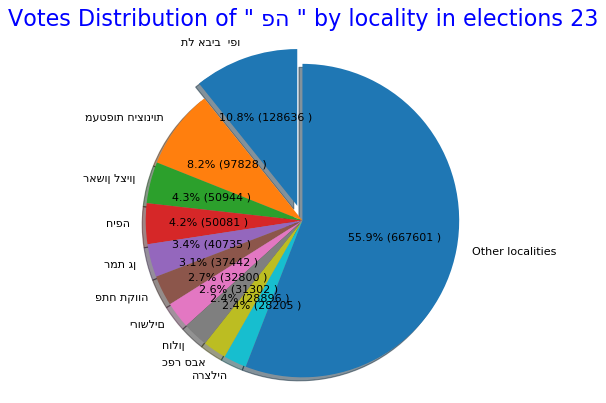

In [123]:
# plot_votes_by_locality(df_c_23.sort_values(by = df_c_23.columns[29],ascending=False, axis=0), 29)

figure1 = plot_votes_by_locality(df_c_21.sort_values(by = df_c_21.columns[33],ascending=False, axis=0), 33, 21)
figure2 = plot_votes_by_locality(df_c_22.sort_values(by = df_c_22.columns[29],ascending=False, axis=0), 29, 22)
figure3 = plot_votes_by_locality(df_c_23.sort_values(by = df_c_23.columns[29],ascending=False, axis=0), 29, 23)

plt.show()

## Arab Common List votes by localties in elections 23

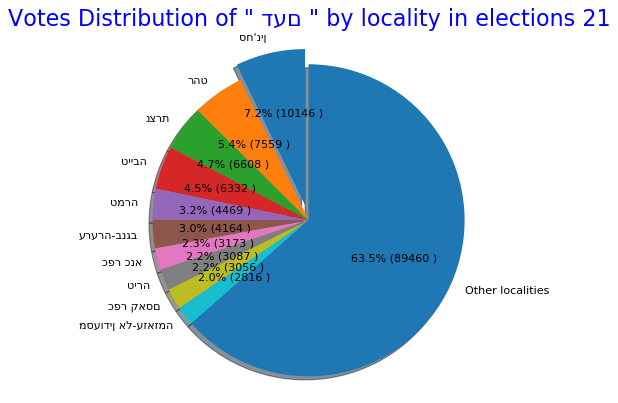

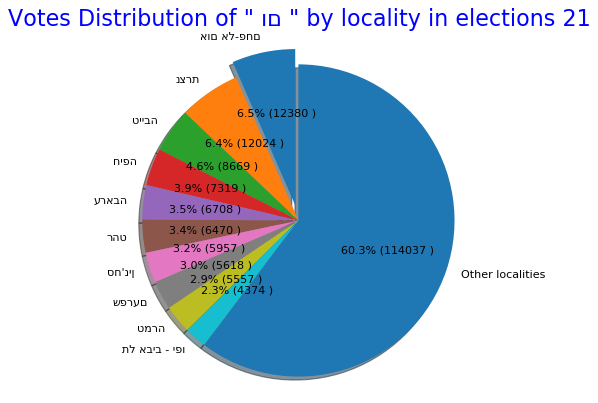

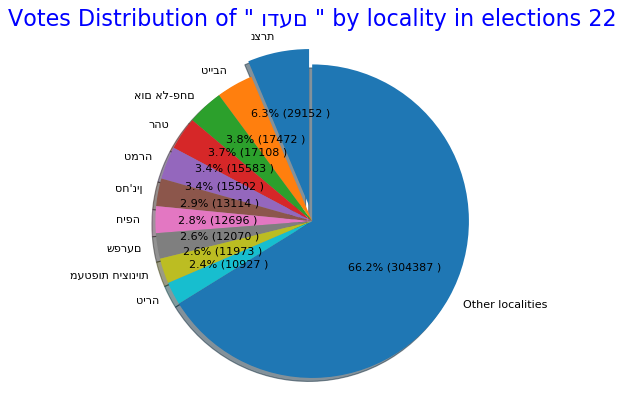

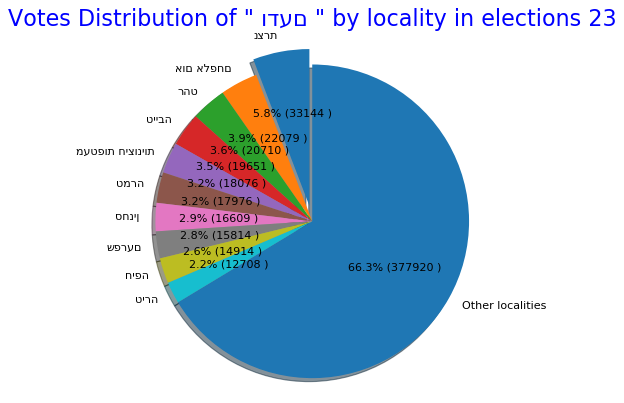

In [126]:
# plot_votes_by_locality(df_c_23.sort_values(by = df_c_23.columns[9],ascending=False, axis=0), 9)

figure1 = plot_votes_by_locality(df_c_21.sort_values(by = df_c_21.columns[8],ascending=False, axis=0), 8, 21)
figure1 = plot_votes_by_locality(df_c_21.sort_values(by = df_c_21.columns[9],ascending=False, axis=0), 9, 21)
figure2 = plot_votes_by_locality(df_c_22.sort_values(by = df_c_22.columns[9],ascending=False, axis=0), 9, 22)
figure3 = plot_votes_by_locality(df_c_23.sort_values(by = df_c_23.columns[9],ascending=False, axis=0), 9, 23)

plt.show()

# The highest 10 localities with Disqualified number of votes in each election 

In [89]:
sorted_df = df_c_21_final.sort_values(by=['Disqualified'],ascending = False).head(10)
sorted_df

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
1010,0,ירושלים,3000,410258,262103,2054,260049,0,64380,48,...,83,27,73,17662,0,87,0,0,0,10
1213,0,מעטפות חיצוניות,99999,0,240783,1961,238822,0,70073,146,...,138,82,209,10822,0,361,0,0,0,31
1176,0,בני ברק,6100,109000,84202,1398,82804,0,4431,3,...,22,5,11,1900,0,19,0,0,0,1
1174,0,תל אביב - יפו,5000,426398,268795,1194,267601,0,51596,36,...,109,38,121,2899,0,123,0,0,0,21
42,0,אשדוד,70,177630,117488,1107,116381,0,39499,26,...,58,21,41,1869,0,245,0,0,0,17
1136,0,חיפה,4000,247866,145606,1028,144578,0,34217,56,...,55,79,188,3016,0,296,0,0,0,17
1204,0,באר שבע,9000,161391,98993,970,98023,0,42160,32,...,99,39,47,2774,0,222,0,0,0,17
1194,0,פתח תקווה,7900,189414,131617,880,130737,0,41386,24,...,70,24,58,7885,0,273,0,0,0,12
1189,0,נתניה,7400,181085,109241,818,108423,0,41038,22,...,65,33,79,3631,0,158,0,0,0,16
1181,0,חולון,6600,157915,101653,733,100920,0,37856,28,...,79,41,73,1608,0,111,0,0,0,14


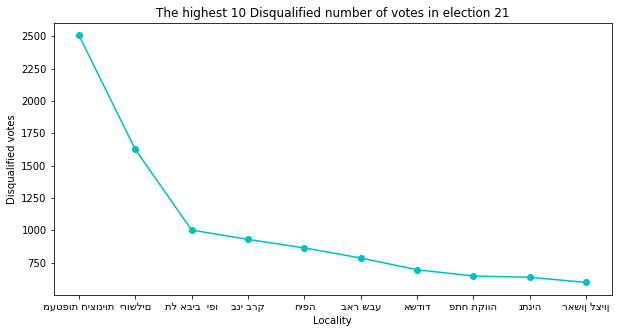

In [111]:
#plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(10,5))
plt.plot(sorted_df['Locality Name'], sorted_df['Disqualified'],'co-')
plt.xlabel('Locality')
plt.ylabel('Disqualified votes')
plt.title('The highest 10 Disqualified number of votes in election 21')
plt.show()

In [91]:
sorted_df = df_c_22_final.sort_values(by=['Disqualified'],ascending = False).head(10)
sorted_df

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
1213,99,מעטפות חיצוניות,9999,0,282442,2226,280216,40,77953,0,...,845,0,0,24810,180,0,73,0,71,0
1010,1,ירושלים,3000,413140,261817,1840,259977,45,59798,0,...,144,0,0,23722,82,0,27,0,8,0
1176,15,בני ברק,6100,110049,85032,1104,83928,0,4027,0,...,4,0,0,1295,8,0,3,0,3,0
1174,14,תל אביב - יפו,5000,430203,267322,979,266343,23,50657,0,...,153,0,0,6985,73,0,32,0,12,0
1136,7,חיפה,4000,248570,144888,846,144042,34,33630,0,...,41,0,0,5586,71,0,29,0,25,0
1204,18,באר שבע,9000,161591,97425,816,96609,14,41939,0,...,43,0,0,4826,43,0,9,0,7,0
42,17,אשדוד,70,178302,116800,808,115992,22,36221,0,...,171,0,0,3689,68,0,11,0,2,0
1202,6,שפרעם,8800,28773,17039,712,16327,22,186,0,...,2,0,0,15,2,0,4,0,2,0
1197,13,ראשון לציון,8300,206016,137633,655,136978,13,46485,0,...,95,0,0,4928,54,0,8,0,7,0
1189,10,נתניה,7400,182945,108350,651,107699,11,38738,0,...,60,0,0,6352,61,0,17,0,12,0


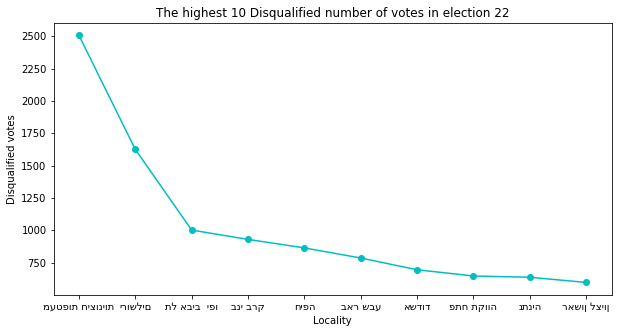

In [109]:
#plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(10,5))
plt.plot(sorted_df['Locality Name'], sorted_df['Disqualified'],'co-')
plt.xlabel('Locality')
plt.ylabel('Disqualified votes')
plt.title('The highest 10 Disqualified number of votes in election 22')
plt.show()

In [93]:
sorted_df = df_c_23_final.sort_values(by=['Disqualified'],ascending = False).head(10)
sorted_df

,committee code,Locality Name,Locality Code,BzB,Voters,Disqualified,Qualified,1,2,3,...,51,52,53,54,55,56,57,58,59,60
712,99,מעטפות חיצוניות,9999,0,330209,2507,327702,0,107049,0,...,0,66,0,27357,0,0,58,0,0,0
494,1,ירושלים,3000,415991,263214,1625,261589,0,72601,0,...,0,41,0,20701,0,0,25,0,0,0
1189,14,תל אביב יפו,5000,434208,268116,1001,267115,0,58363,0,...,0,29,0,5942,0,0,37,0,0,0
196,15,בני ברק,6100,111344,85775,929,84846,0,4951,0,...,0,5,0,1200,0,0,2,0,0,0
406,7,חיפה,4000,249627,145488,863,144625,0,38464,0,...,0,24,0,5020,0,0,41,0,0,0
129,18,באר שבע,9000,161968,100051,785,99266,0,49801,0,...,0,5,0,4442,0,0,24,0,0,0
114,17,אשדוד,70,179046,118313,694,117619,0,43073,0,...,0,10,0,3124,0,0,27,0,0,0
989,11,פתח תקווה,7900,191908,132135,646,131489,0,47257,0,...,0,26,0,11937,0,0,28,0,0,0
861,10,נתניה,7400,184613,110399,636,109763,0,47267,0,...,0,19,0,5172,0,0,25,0,0,0
1058,13,ראשון לציון,8300,207038,138490,596,137894,0,55394,0,...,0,11,0,4424,0,0,25,0,0,0


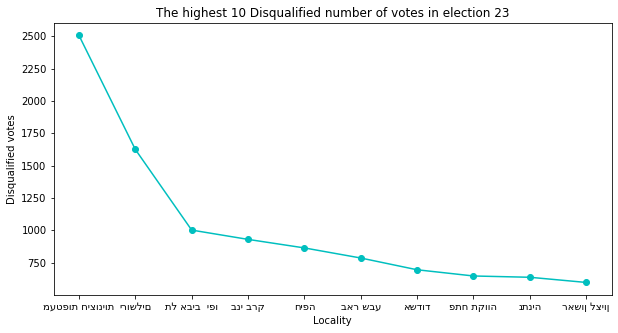

In [110]:

fig = plt.figure(figsize=(10,5))
plt.plot(sorted_df['Locality Name'], sorted_df['Disqualified'],'co-')
plt.xlabel('Locality')
plt.ylabel('Disqualified votes')
plt.title('The highest 10 Disqualified number of votes in election 23')
plt.show()

Union 21 + 22 results for training and validation

In [95]:
df_train_polling = pd.concat([df_b_21_final, df_b_22_final], axis=0)
df_train_polling.head()

,committee code,Barzel,Locality Name,Locality Code,Polling Num,Rikuz,Judge,BzB,Voters,Disqualified,...,51,52,53,54,55,56,57,58,59,60
0,0,0,אבו ג'ווייעד (שבט),967,1.0,0,0,546,64,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,אבו ג'ווייעד (שבט),967,2.0,0,0,739,113,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,אבו ג'ווייעד (שבט),967,3.0,0,0,630,98,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,אבו גוש,472,1.0,0,0,518,197,6,...,0,0,0,1,0,0,0,0,0,0
4,0,0,אבו גוש,472,2.0,0,0,679,290,3,...,0,0,0,2,0,0,0,0,0,0


## המידע נלקח עבור הקלסטרינג רק משתי מערכות הבחירות 21 ו-22

Grouping parties by blocks (Right, Center, Left) - Election 21

In [96]:
groupby_dict = {
                'נ':'Right Block', 
                'ז':'Right Block',
                'זך':'Right Block',
                'ל':'Right Block',
                'ג':'Right Block', 
                'ףץ':'Right Block',
                'קי':'Right Block',
                'יץ':'Right Block',
                'יז':'Right Block',
                'כ':'Right Block',
                'מחל':'Right Block',
                'זץ':'Right Block',
                'טב':'Right Block',
                'שס':'Right Block',
                'זנ':'Right Block',
    
                'ץ':'Center Block',
                'קן':'Center Block',
                'נץ':'Center Block',
                'קף':'Center Block',
                'נר':'Center Block',
                'ץי':'Center Block',
                'פה':'Center Block',
                'זי':'Center Block',
                'ףך':'Center Block',
                'ךק':'Center Block',
    
                'ן':'Left Block',
                'ין':'Left Block',
                'ק':'Left Block',
                'צק':'Left Block',
                'י':'Left Block',
                'ףז':'Left Block',
                'ףי':'Left Block',
                'ןנ':'Left Block',
                'נז':'Left Block',
                'ןך':'Left Block',
                'ףנ':'Left Block',
                'ץז':'Left Block',
                'ר':'Left Block',
                'אמת':'Left Block',
                'נך':'Left Block',
                'מרץ':'Left Block',
                'דעם':'Left Block',
                'ום':'Left Block'
               }

df_blocks_21 = df_c_21.groupby(groupby_dict, axis = 1).sum() #.reset_index()
# print(df_blocks_22.shape)
# print(df_blocks_22.head())

result_21 = pd.concat([df_c_21.iloc[:,[1]], df_blocks_21], axis=1)
print(result_21.shape)
result_21.head()

(1214, 4)


,סמל ישוב,Center Block,Left Block,Right Block
0,7,108,17,237
1,10,6,4,224
2,11,123,21,134
3,13,258,47,81
4,15,7,1,207


Grouping parties by blocks (Right, Center, Left) - Election 22

In [97]:

groupby_dict = {
                'ג':'Right Block', 
                'הי':'Right Block',
                'הפ':'Right Block',
                'ז':'Right Block',
                'זך':'Right Block', 
                'טב':'Right Block',
                'כף':'Right Block',
                'ל':'Right Block',
                'מחל':'Right Block',
                'שס':'Right Block',
    
                'יק':'Center Block',
                'כ':'Center Block',
                'כן':'Center Block',
                'נ':'Center Block',
                'ני':'Center Block',
                'נץ':'Center Block',
                'פה':'Center Block',
                'פנ':'Center Block',
                'צ':'Center Block',
    
                'אמת':'Left Block',
                'הק':'Left Block',
                'ודעם':'Left Block',
                'מרץ':'Left Block',
                'נק':'Left Block',
                'ףז':'Left Block',
                'פי':'Left Block',
                'פץ':'Left Block',
                'נק':'Left Block',
                'צפ':'Left Block',
                'צק':'Left Block',
                'ץ':'Left Block',
                'קנ':'Left Block',
                'רק':'Left Block'
               }

df_blocks_22 = df_c_22.groupby(groupby_dict, axis = 1).sum() #.reset_index()
# print(df_blocks_22.shape)
# print(df_blocks_22.head())

result_22 = pd.concat([df_c_22.iloc[:,[2]], df_blocks_22], axis=1)
print(result_22.shape)
print(result_22.head())

(1214, 4)
   סמל ישוב  Center Block  Left Block  Right Block
0         7            98          31          217
1        10             6           1          217
2        11            95          33           90
3        13           216          24           67
4        15            13           1          211


Joining blocks data from both elections 21 + 22 togrther

In [98]:
# result = np.concatenate((result_21, result_22), axis=0)
result = pd.concat([result_21, result_22], axis=0)
print("Train data: ", result.shape, "\n", result.head())

Train data:  (2428, 4) 
    סמל ישוב  Center Block  Left Block  Right Block
0         7           108          17          237
1        10             6           4          224
2        11           123          21          134
3        13           258          47           81
4        15             7           1          207


## Load Localities Data

In [99]:
bycode_df = pd.read_excel("datasets/bycode2018.xlsx", usecols=[1, 14]) # עמודות: סמל ישוב + צורת יישוב שוטפת
bycode_df.head()
# print(bycode_df.iloc[:, [1,14]])
# cities = bycode_df.values[:,[1,14]] # סמל ישוב + צורת ישוב
# print(cities.shape)
# print(cities)

,סמל ישוב,צורת יישוב שוטפת
0,967,460
1,472,280
2,473,270
3,935,460
4,958,460


## Load Localities Index

In [100]:
# example: DID = pd.read_excel(file1, sheet_name=0, header=None, usecols=[0, 1, 6], names=['A', 'ID', 'B'], 
# dtype={2:str}, skiprows=10)

index_df = pd.read_excel("datasets/index 2018.xlsx", sheet_name='צורת יישוב', header=None, usecols=[0, 2], 
                         names=['צורת יישוב', 'צורת יישוב שוטפת']) #.rename(index={0: 'סמל ישוב'})
index_df = index_df.iloc[3:,:]
index_df = index_df.dropna()
print(index_df.shape)
index_df.head()
# print(index_df.columns)
# print(index_df.iloc[3:,:])

# indexes = index_df.values[:,[0,2]]
# print(indexes.shape)
# print(indexes)

(28, 2)


,צורת יישוב,צורת יישוב שוטפת
4,"יישובים יהודיים 500,000 תושבים ומעלה",120
5,"יישובים יהודיים 499,999-200,000 תושבים",130
6,"יישובים יהודיים 199,999-100,000 תושבים",140
7,"יישובים יהודיים 99,999-50,000 תושבים",150
8,"יישובים לא יהודיים 99,999-50,000 תושבים",250


## Data Preperation - Join Dataframes

In [101]:
# dat = df_21.join(bycode_df.set_index('סמל ישוב'), on='סמל ישוב')
dat = pd.merge(result, bycode_df, on='סמל ישוב', how='inner') # עמודה 1: סמל ישוב
# print(dat.shape)
# print(dat)

dat = pd.merge(dat, index_df, on='צורת יישוב שוטפת', how='left')
print(dat.shape)
dat.head()

(2424, 6)


,סמל ישוב,Center Block,Left Block,Right Block,צורת יישוב שוטפת,צורת יישוב
0,7,108,17,237,310,מושבים
1,7,98,31,217,310,מושבים
2,10,6,4,224,310,מושבים
3,10,6,1,217,310,מושבים
4,11,123,21,134,310,מושבים


## Correlation matrix between : "Center Block","Left Block", "Right Block"

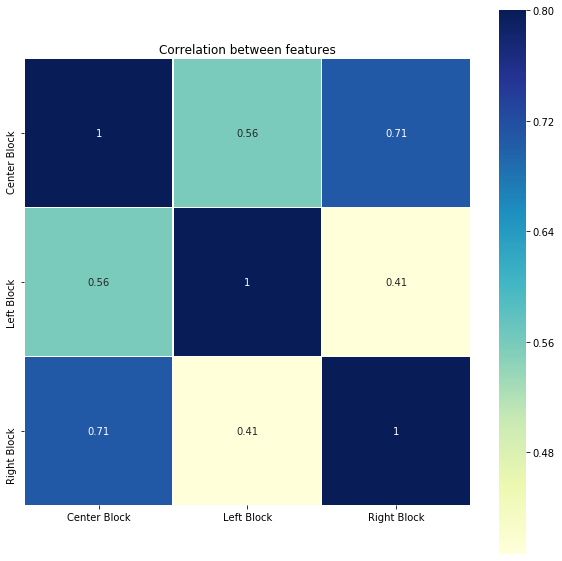

In [102]:
filteredDF = dat[["Center Block","Left Block", "Right Block"]]
corrMatrix = filteredDF.corr()
figure = plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

## ניתוח
<br>
אפשר לראות שישנה קורלציה יותר חזקה בין גוש הימין לבין גוש המרכז (מעל 0.5) אבל היא יותר חלשה עם גוש השמאל 0.41

## Scatter matrix between : "Center Block","Left Block", "Right Block"

<Figure size 720x720 with 0 Axes>

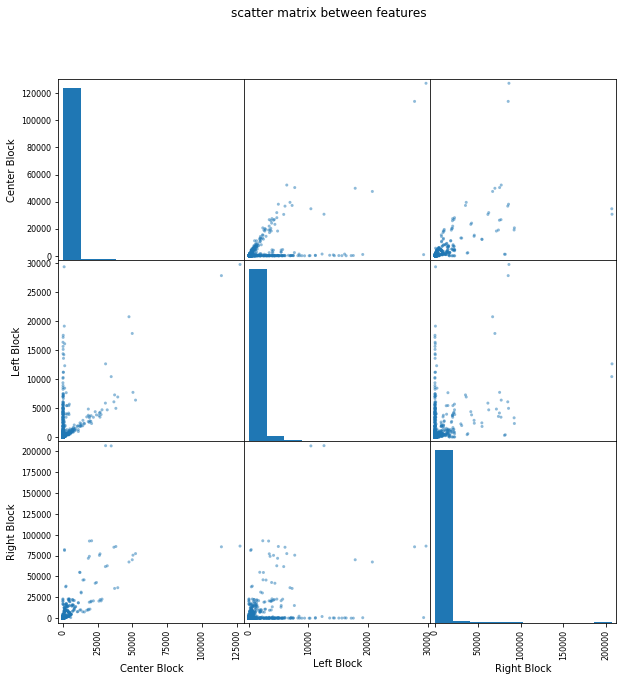

In [103]:
fig = plt.figure(figsize=(10,10))
pd.plotting.scatter_matrix(filteredDF,figsize=(10, 10),alpha=0.5)
plt.suptitle('scatter matrix between features');

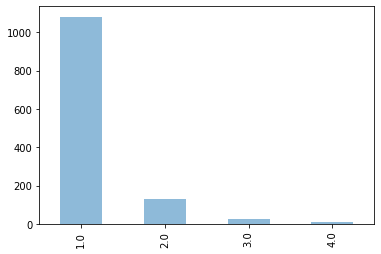

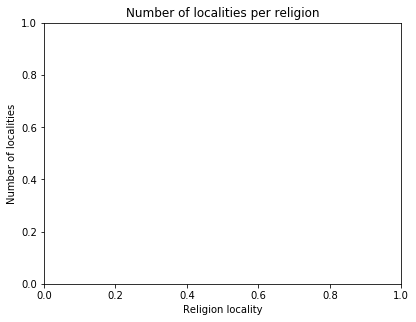

In [112]:
bycode2018_df = pd.read_excel("datasets/bycode2018.xlsx", usecols=[1, 8]) # עמודות: סמל ישוב + דת יישוב 
bycode2018_df.head()
bycode2018_df['דת יישוב'].value_counts().plot(kind="bar",alpha=0.5)

fig = plt.figure(figsize=(6.4,4.8))
plt.xlabel('Religion locality')
plt.ylabel('Number of localities')
plt.title('Number of localities per religion')
plt.show()